# Important Probability Distributions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
import pandas as pd

We will make use of the `stats` package within the `scipy` suite of tools for scientific python

In [2]:
import scipy.stats

## <span style="color:Orange">Overview</span>

Is this section we provide a brief overview of probability distributions that follows from the previous proabability theory lecture.

### <span style="color:Lightgreen">What is a Probability Distribution?</span>

A probability distribution is a mathematical function that defines the likelihood of different outcomes or values of a random variable. Probability distributions are fundamental in probability theory and statistics and useful for for analyzing scientific data and making predictions. We more formally refer to these functions as <span style="color:violet">probability density functions</span> (PDFs) when they are normalized to unity such that the intetral over their domain equals 1. 

A brief description of probability distributions, often encountered in practical applications, is presented in the following. The rationale leading to this choice of PDFs is driven either by their specific mathematical properties, and/or in view of their common usage in the modellingi of important physical processes; such features are correspondingly emphasized in the discussion.

### <span style="color:Lightgreen">Zoology of PDFs in SciPy</span>

There are many named statistical distributions with useful properties and/or interesting history.  For example, in the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module we find a large number of <span style="color:violet">1D continuous</span> random variable distributions:

In [3]:
len(scipy.stats.rv_continuous.__subclasses__())

106

and a smaller number of <span style="color:violet">1D discrete</span> distributions:

In [4]:
len(scipy.stats.rv_discrete.__subclasses__())

20

and <span style="color:violet">multidimensional continuous</span> distributions:

In [5]:
len(scipy.stats._multivariate.multi_rv_generic.__subclasses__())

17

## <span style="color:Orange">Some Useful Probabiltiy Distributions</span>

You will likely never need all or even most of these probability distributions in practical application, but it is useful to know about them. Most have special applications that they were created for, but can also be useful as building blocks of an empirical distribution when you just want something that looks like the data.

### <span style="color:Lightgreen">1D Continuous Distributions</span>

It is useful to group the large number of 1D continuous distributions according to their general shape. We will use the function below for a quick visual tour of some PDFs in each group:

In [6]:
def pdf_demo(xlo, xhi, **kwargs):
    x = np.linspace(xlo, xhi, 200)
    cmap = sns.color_palette().as_hex()
    for i, name in enumerate(kwargs):
        for j, arglist in enumerate(kwargs[name].split(';')):
            args = eval('dict(' + arglist + ')')
            y = eval('scipy.stats.' + name)(**args).pdf(x)
            plt.plot(x, y, c=cmap[i], ls=('-','--',':')[j], label=name)
    plt.xlim(x[0], x[-1])
    plt.legend(fontsize='large')

First, the centered symmetric peaked distributions, including the ubiquitous Gaussian (here called "norm") and Lorentzian (here called "cauchy").  Each of these can be re-centered using the `loc` (location) parameter and broadened using `scale`:

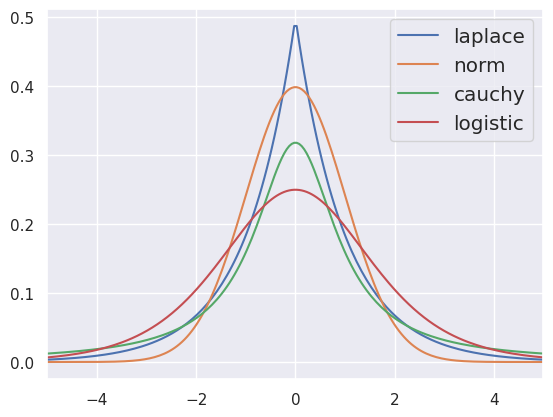

In [7]:
pdf_demo(-5, +5, laplace='scale=1', norm='scale=1', cauchy='scale=1', logistic='scale=1')

#### <span style="color:violet">The Gaussian Distribution in 1D and 2D</span>

The Gaussian distribution is commoning found in scientific applications, for example representing the response function of an observable in an experimental apparatus with finite resolution. It is given by

$$\Large P(x; \mu, \sigma) = \frac{1}{{\sigma \sqrt{2\pi}}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

where
* $\mu$ represents the mean (average) of the distribution.
* $\sigma$ represents the standard deviation of the distribution.
* $x$ is the variable for which you want to calculate the probability density.

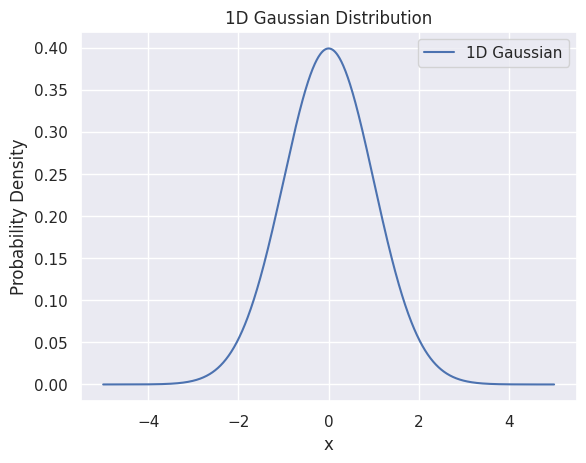

In [8]:
# Define parameters
mu = 0       # Mean
sigma = 1    # Standard deviation

# Create data points
x = np.linspace(-5, 5, 1000)  # Range of x values

# Calculate the 1D Gaussian function
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot the Gaussian function
plt.plot(x, gaussian, label='1D Gaussian')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.title('1D Gaussian Distribution')
plt.grid(True)
plt.show()


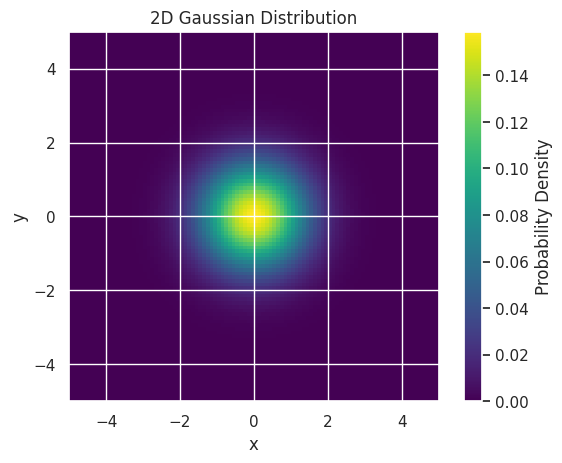

In [9]:
# Define parameters
mu_x = 0        # Mean along x-axis
mu_y = 0        # Mean along y-axis
sigma_x = 1     # Standard deviation along x-axis
sigma_y = 1     # Standard deviation along y-axis

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the 2D Gaussian function
gaussian = (
    1 / (2 * np.pi * sigma_x * sigma_y)
) * np.exp(
    -((X - mu_x)**2 / (2 * sigma_x**2) + (Y - mu_y)**2 / (2 * sigma_y**2))
)

# Plot the 2D Gaussian function as a heatmap
plt.imshow(gaussian, cmap='viridis', extent=(-5, 5, -5, 5), origin='lower')
plt.colorbar(label='Probability Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Gaussian Distribution')
plt.show()


#### <span style="color:violet">The Breit-Wigner distribution</span>

The Breit-Wigner distribution is a probability distribution often used in physics to describe resonances or the shape of spectral lines. It is also known by several other names and variations, depending on the context and field of study. The Breit-Wigner is also called Lorentzian by physicists, and in mathematics circles it is often referred to as the Cauchy distribution.

In the context of relativistic kinematics, the Breit-Wigner function provides a good description of a resonant process (for example the invariant mass of decay products from a resonant intermediate state); for a resonance, the parameters x0 and Γ are referred to as its mass and its natural width, respectively.

$$\Large P(x; \Gamma, x_0) = \frac{1}{\pi}\frac{\Gamma}{(x - x_0)^2 + \Gamma^2}$$

whose parameters are the most probable value $x_0$ (which specifies the peak of the distribution), and the FWHM $\Gamma$.

With some representative parameters, it look like this:

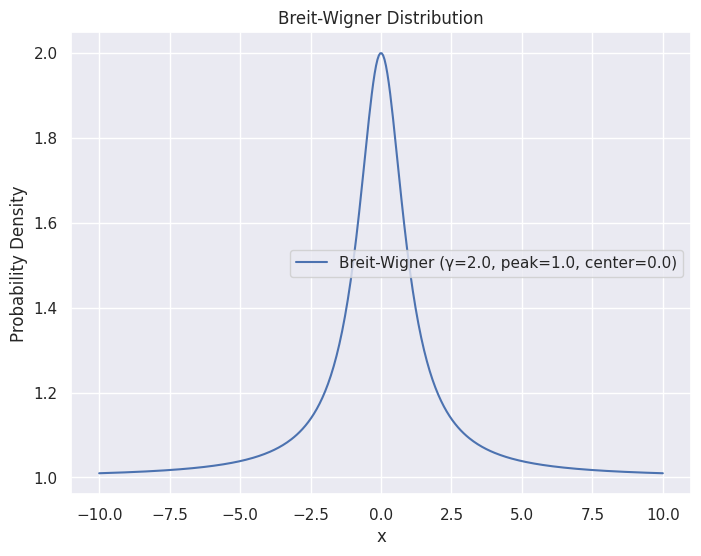

In [10]:
# Define the Breit-Wigner distribution function
def breit_wigner(x, gamma, peak, center):
    return (gamma / 2) / ((x - center)**2 + (gamma / 2)**2) + peak

# Parameters for the distribution
gamma = 2.0  # Width parameter (half-width at half-maximum)
peak = 1.0   # Peak height
center = 0.0  # Center position

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate the corresponding y values using the Breit-Wigner function
y = breit_wigner(x, gamma, peak, center)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Breit-Wigner (γ={gamma}, peak={peak}, center={center})')
plt.title('Breit-Wigner Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

The Breit-Wigner probability distribution has a peculiar feature, as a consequence of its long-range tails: the empirical average and empirical RMS are ill-defined (their variance increase with the size of the samples), and cannot be used as estimators of the Breit-Wigner parameters. The truncated mean and
interquartile range, which are obtained by removing events in the low and high ends of the sample, are
safer estimators of the Breit-Wigner parameters

----------

There are also some more specialized asymmetric "bump" distributions that are particularly useful for modeling histograms of reconstructed particle masses (even more specialized is the Cruijff function used [here](https://arxiv.org/abs/1005.4087)):

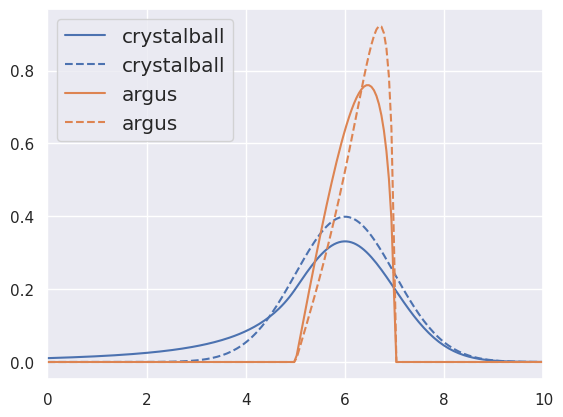

In [11]:
pdf_demo(0, 10, crystalball='beta=1,m=3,loc=6;beta=10,m=3,loc=6', argus='chi=0.5,loc=5,scale=2;chi=1.5,loc=5,scale=2')

#### <span style="color:violet">The Crystal Ball distribution</span>

The Crystal Ball function is named after the Crystal Ball Collaboration. The Crystal Ball was a hermetic particle detector used initially with the SPEAR particle accelerator at the Stanford Linear Accelerator Center beginning in 1979. It was designed to detect neutral particles and was used to discover the ηc meson.


The Crystal Ball function is a probability density function commonly used to model various lossy processes in high-energy physics. It consists of a Gaussian core portion and a power-law low-end tail, below a certain threshold. The function itself is shown below

$$\Large 
f(x; \alpha, n, \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}\left\{
  \begin{array}{ll}
    e^{-\frac{(x - \mu)^2}{2\sigma^2}} & \text{if } \frac{x - \mu}{\sigma} > -\alpha \\
    A\left(B - \frac{x - \mu}{\sigma}\right)^{-n} & \text{if } \frac{x - \mu}{\sigma} \leq -\alpha
  \end{array}
\right.
$$

Both the function and its first derivative are both continuous. 

Crystall Ball functions were used to model the Higgs boson di-photon signal shape in the $H\to\gamma\gamma$ decay channel for the 2012 Higgs boson discovery by the ATLAS and CMS Collaborations.

----------

Next, the "one-sided" distributions that are only defined for $x \ge 0$. Most of these smoothly transition from peaking at the origin to peaking at $x > 0$ as some parameter is varied. These are useful building blocks for quantities that must be positive, e.g., errors or densities.

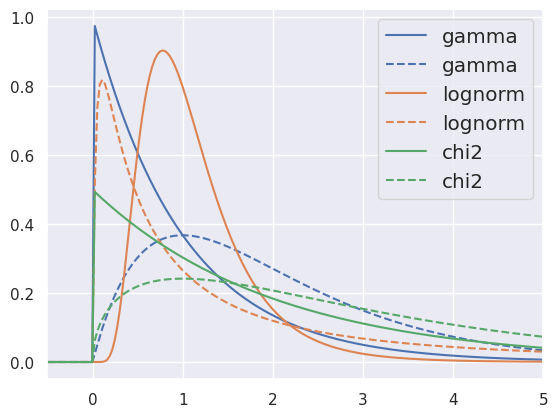

In [12]:
pdf_demo(-0.5, 5, gamma='a=1;a=2', lognorm='s=0.5;s=1.5', chi2='df=2;df=3')

#### <span style="color:violet">The Exponential distribution</span>

The exponential distribution is a special case of the Gamma distribution with the shape parameter $a=1$, although the exponential distribution is only supported for $x \ge 0$. The exponential distribution is one of the widely used continuous distributions. It is often used to model the time elapsed between events, such as the decay of unstable nuclei. A common application of this exponential distribution is the description of phenomena occuring independently at a constant rate, such as decay lengths and lifetimes.

It is given by:

$$\Large
f(x;\lambda) = 
\begin{cases}
\lambda e^{-\lambda x} & \text{for } x \geq 0 \\
0 & \text{for } x < 0
\end{cases}
$$

where $\lambda$ is the rate parameter.

In view of the self-similar feature of the exponential function:

$$\Large P(t − t_0 | t > t_0) = P(t)$$

the exponential distribution is sometimes said to be ___memoryless___.

#### <span style="color:violet">The Chi-squared distribution</span>

The [chi2 distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) ($\chi^2$) is especially useful for parameter fitting, goodness-of-fit measures, and confidence interval calculations. It is given by:

$$\Large f(x;n) = \frac{1}{{2^{n/2}\Gamma(n/2)}} x^{(n/2)-1} e^{-x/2}$$

where $x$ is the random variable, $n$ is the number of degrees of freedom, and $\Gamma$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_distribution) (in fact, the $\chi^2$ distribution can be considered to be a special case of the $\Gamma$ function).

The name "degrees-of-freedom" refers to the expected behaviour of a least-square fit involving the $\chi^2$ test statistic,  

$$\Large \chi^2 = \sum_{i=1}^{n_d} \left( \frac{y_i - f(x_i | \vec{\alpha})}{\sigma_i} \right)^2$$

where $n_d$ data points are used to estimate a set of $n_p$ parameters $\vec{\alpha}$; the corresponding number of degrees of freedom is $n_d$ − $n_p$. 

For a well-behaved fit where the deviation of the measured points from the model follows Gaussian distributions with variances $\sigma^2_i$, the $\chi^2$ value should follow a $\chi^2$ distribution. The comparison of an observed $\chi^2$ value with its expectation, is an example of goodness-of-fit test (Pearson's test).

Here are two handy utilities that you will likely need at some point, expecially when we talk about confidence intervals (using the CDF and [inverse-CDF](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html#scipy.stats.rv_continuous.ppf) functions):

In [13]:
def nsigmas_to_CL(nsigmas=1., D=1):
    return scipy.stats.chi2.cdf(x=nsigmas ** 2, df=D)
def CL_to_nsigmas(CL=0.95, D=1):
    return np.sqrt(scipy.stats.chi2.ppf(q=CL, df=D))

For example, a "1-sigma" error bar contains ~68% of a Gaussian distribution in 1D, but a 2D "1-sigma" contour only contains ~39%:

In [14]:
nsigmas_to_CL(nsigmas=1, D=[1, 2])

array([0.68268949, 0.39346934])

To find the number of sigmas required to enclose a specific integrated probability (aka "confidence level (CL)") in D dimensions:

In [15]:
CL_to_nsigmas(CL=0.95, D=[1, 2])

array([1.95996398, 2.44774683])

-----------

Another useful group are the "bounded" distributions, especially the versatile two-parameter [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution):

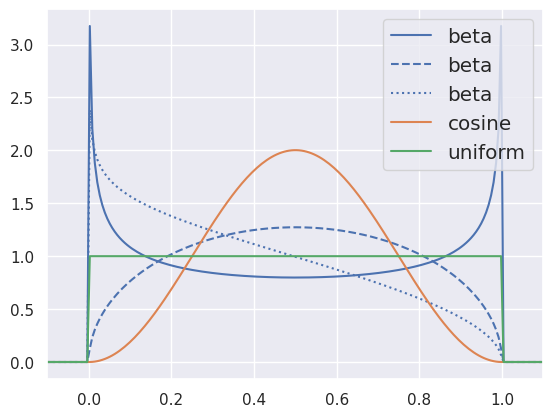

In [16]:
pdf_demo(-0.1, 1.1, beta='a=.7,b=.7;a=1.5,b=1.5;a=.9,b=1.5', cosine='loc=0.5,scale=0.159',
         uniform='scale=1')

All of the 1D continuous distributions share the same API (via a [common base class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html)), and allow you to perform useful operations including:
 - Evaluate the PDF, log(PDF), CDF or log(CDF).
 - Generate random values from the distribution.
 - Calculate expectation values of moment functions or even arbitrary functions.

The API also allows you to estimate the values of distribution parameters that best describe some data, but we will soon see better approaches to this "regression" problem.

In [17]:
def rv_continuous_demo(xlo, xhi, dist, seed=123, n=500):
    x = np.linspace(xlo, xhi, 200)
    P = dist.pdf(x)
    plt.plot(x, P, ls='-', label='PDF $P(x)$')

    g = lambda x: (0.7 - 0.3 * (x - xlo) / (xhi - xlo)) * np.percentile(P, 95)
    plt.plot(x, g(x), ':', label='$g(x)$')
    print('<g> =', dist.expect(g))
    
    gen = np.random.RandomState(seed=seed)
    data = dist.rvs(size=n, random_state=gen)
    plt.hist(data, range=(xlo, xhi), bins=20, histtype='stepfilled',
             alpha=0.25, density=True, stacked = True, label='Random')
    
    plt.ylim(0, None)
    plt.grid(axis='y')
    plt.legend(loc='upper left', fontsize='large')
    rhs = plt.twinx()
    rhs.set_ylabel('CDF')
    rhs.set_ylim(0., 1.05)
    rhs.grid('off')
    rhs.plot(x, dist.cdf(x), 'k--')
    plt.xlim(xlo, xhi)

<g> = 0.21420671411482053


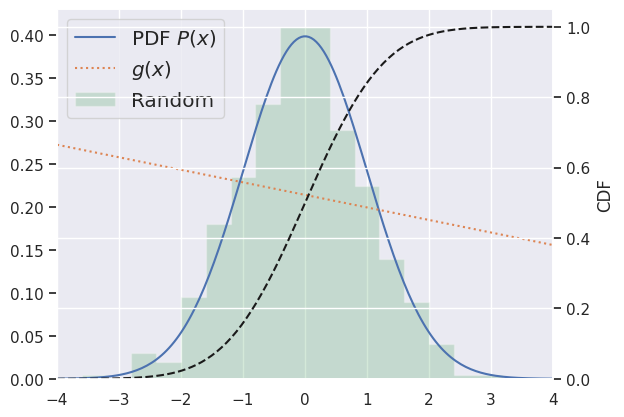

In [18]:
rv_continuous_demo(-4, +4, scipy.stats.norm())

<g> = 0.8840573776020221


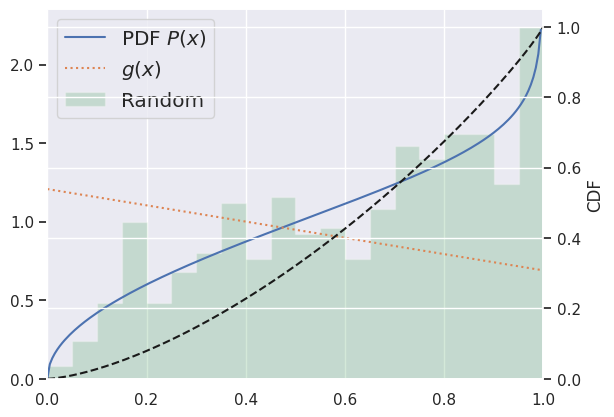

In [19]:
rv_continuous_demo(0, 1, scipy.stats.beta(a=1.5,b=0.9))

### <span style="color:Lightgreen">1D Discrete Distributions</span>

Finally, there are some essential discrete random variable distributions, where the PDF is replaced with what is called in probabilty and statistics a [probability mass function (PMF)](https://en.wikipedia.org/wiki/Probability_mass_function):

In [20]:
def pmf_demo(klo, khi, **kwargs):
    k = np.arange(klo, khi + 1)
    cmap = sns.color_palette().as_hex()
    histopts = {'bins': khi-klo+1, 'range': (klo-0.5,khi+0.5), 'histtype': 'step', 'lw': 2}
    for i, name in enumerate(kwargs):
        for j, arglist in enumerate(kwargs[name].split(';')):
            args = eval('dict(' + arglist + ')')
            y = eval('scipy.stats.' + name)(**args).pmf(k)
            plt.hist(k, weights=y, color=cmap[i], linestyle=('-','--',':')[j], label=name, **histopts)
    plt.legend(fontsize='large')

The PMF is also known as the <span style="color:violet">discrete probability density function</span> (dPDF). Lets roll with the PMF name even though I do not really like it since it has nothing to do with physical mass. However, thinking of probability as mass helps to avoid mistakes since the physical mass is conserved as is the total probability for all hypothetical outcomes.


#### <span style="color:violet">The Binomial Distribution</span>

Consider a scenario with two possible outcomes: “success” or “failure”, with a fixed probability $p$ of “success” being realized (this is also called a ___Bernouilli trial___). If $n$ trials are performed, $0 ≤ k ≤ n$ may actually result in “success”; it is assumed that the sequence of trials is irrelevant, and only the number of “success” $k$ is considered of interest. The integer number $k$ follows the so-called [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) $P(k; n, p)$:

$$\Large P(k; n,p) = \binom{n}{k} p^k (1-p)^{n-k}$$

where $\binom{n}{k}$ is the binomial coefficient, which can be calculated as

$$\Large \binom{n}{k} = \frac{n!}{k!(n-k)!}$$

The binomial distribution is related to the beta distribution previously shown, and describes the statistics of ratios of counting measurements (efficiency, purity, completeness, ...):

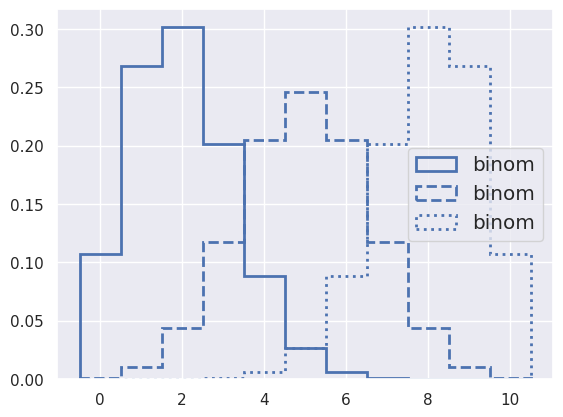

In [21]:
pmf_demo(0, 10, binom='n=10,p=0.2;n=10,p=0.5;n=10,p=0.8')

#### <span style="color:violet">The Poisson Distribution</span>

In the $n → ∞$, $~p → 0$ limit (with $λ = np$ finite and non-zero) for the Binomial distribution, the random
variable $k$ follows the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) $P(k; \lambda)$,

$$\Large P(k; \lambda) = \frac{e^{-\lambda} \lambda^k}{k!}$$

where $\lambda$ is the rate parameter defining the average rate at which events occur.

The Poisson distribution is sometimes called the "law of rare events" in view of the $p → 0$ limit. It is a useful model for describing the statistics of event-counting rates in (uncorrelated) counting measurements (which are ubiquitous in astronomy and particle physics)

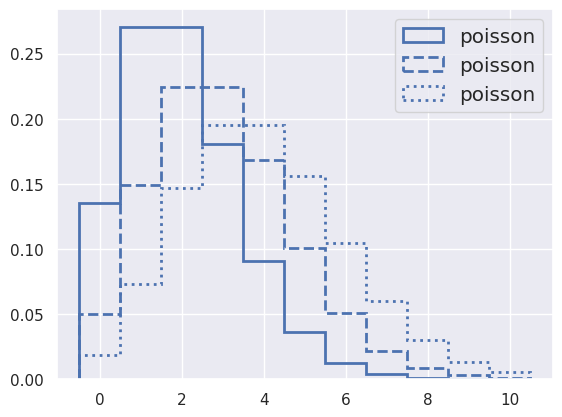

In [22]:
pmf_demo(0, 10, poisson='mu=2;mu=3;mu=4')

Poisson distribution is used to model the number of events occuring in the future, In comparison to the previously described Exponential and Gamma distributions, the Exponential distribution is used to predict the wait time until the very first event, and Gamma distribution is used to predict the wait time until the $\alpha$-th event.

------------

## <span style="color:Orange">Central Limit Theorem</span>

The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) (CLT) is a fundamental concept in statistics that describes the behavior of the **sampling distribution** of the **sample mean** (or other sample statistics) of a random sample from any population, regardless of its underlying distribution.

The Central Limit Theorem can be stated as follows:

> When independent and identically distributed random variables are sampled from a population, the **distribution of the sample means** approaches a **normal distribution** as the **sample size increases**, regardless of the shape of the original population distribution.

Another slightly less precise but more concise statement of the CLT is:
> The mean (or sum) of samples drawn from any distribution tends toward a Gaussian distribution.

A few key points about the CLT:
- ___<span style="color:violet">Independence</span>___: The random variables in the sample must be independent, meaning that the outcome of one observation does not affect the outcome of another.
- ___<span style="color:violet">Identical Distribution</span>___: Each random variable in the sample must be drawn from the same probability distribution.
- ___<span style="color:violet">Sample Size</span>___: As the sample size increases, the **sampling distribution** of the sample mean becomes increasingly closer to a normal distribution, with the mean of the sampling distribution equal to the population mean and a standard deviation (standard error) that depends on the population standard deviation and the square root of the sample size.

The CLT is a crucial theorem in probability theory and statistics and has wide-ranging applications in data analysis. It allows us to make statistical inferences about a population based on the distribution of sample means, even when we don't know the exact nature of the population distribution. It provides the theoretical foundation for hypothesis testing, confidence intervals, and many other statistical techniques. It is also often used when dealing with large datasets, common in particle physics and astrophysics, as it allows us to assume that the distribution of sample means is approximately normal, simplifying many statistical analyses.



The following exercise provides a simple numerical demonstration of the CLT:

___<span style="color:violet">EXERCISE</span>___: Fill in the function below to generate `nsample` samples of size `size` from an arbitrary 1D continuous distribution, and then display an `sns.distplot` of the mean values of each generated sample:
```
def central_limit_demo(dist, nsample, size, seed=123):
    gen = np.random.RandomState(seed=seed)
    ...
```
Test your function using:
```
central_limit_demo(scipy.stats.uniform(scale=1), nsample=100, size=100)
central_limit_demo(scipy.stats.lognorm(s=0.5), nsample=100, size=100)
```

In [23]:
def central_limit_demo(dist, nsample, size, seed=123):
    gen = np.random.RandomState(seed=seed)
    means = []
    for i in range(nsample):
        data = dist.rvs(size=size, random_state=gen)
        means.append(np.mean(data))
    sns.histplot(means, kde=True, stat="density", kde_kws=dict(cut=3))

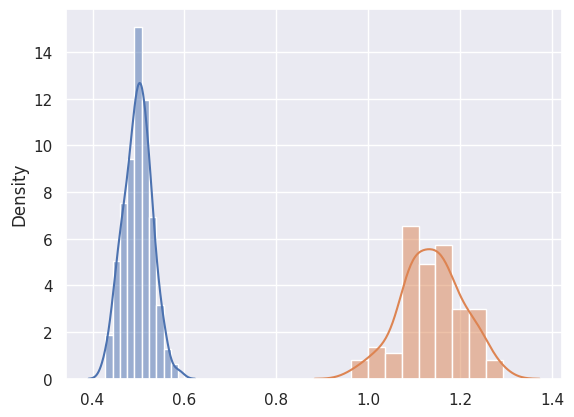

In [24]:
central_limit_demo(scipy.stats.uniform(scale=1), nsample=100, size=100)
central_limit_demo(scipy.stats.lognorm(s=0.5), nsample=100, size=100)

Here is a nicer [interactive demonstration](https://seeing-theory.brown.edu/probability-distributions/index.html) you can experiment with.

Not surprisingly, any measurement subject to multiple sources of fluctuations is likely to follow a distribution that can be approximated
with a Gaussian distribution to a good approximation, regardless of the specific details of the processes
at play.

The Gaussian is also encountered as the limiting distribution for the Binomial and and Poisson ones, in the large $n$ and large $\lambda$ limits, respectively:

$$\Large P_\text{binomial} (k; n → ∞, p) → P_\text{Gauss} (k; np, np(1 − p))$$

$$\Large P_\text{Poisson} (k; λ → ∞) → P_\text{Gauss} (k; λ, \sqrt{\lambda})$$

Note that, when using a Gaussian as approximation, an appropriate continuity correction needs to be taken into account: the range of the Gaussian extends to negative values, while Binomial and Poisson are only defined in the positive range.

The ___<span style="color:violet">Galton Board</span>___ is a device invented by Sir Francis Galton in 1894 to demonstrate the CLT, in particular that with sufficient sample size the binomial distribution approximates a normal distribution.

The Galton board we have in class consists of a vertical board with interleaved rows of pegs. 6000 Beads are dropped from the top and, when the device is level, bounce either left or right equally as they hit the pegs. Eventually they are collected into bins at the bottom, where the height of bead columns accumulated in the bins approximate a normal distribution. Overlaying [Pascal's triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle) onto the pins shows the number of different paths that can be taken to get to each bin.


<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

For a more powerful statistical toolbox than [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), try the python [statsmodels](http://www.statsmodels.org/) package. Going beyond python, the [R language](https://www.r-project.org/about.html) is designed specifically for "statistical computing" (and [integrated in jupyter](https://irkernel.github.io/)), and [RooFit](https://root.cern.ch/roofit-20-minutes) is a "a toolkit for modeling the expected distribution of events in a physics analysis" integrated into the [ROOT framework](https://root.cern.ch/).

We will be soon be talking more about the general problem of "fitting" the parameters of a distribution to match some data.

## <span style="color:Orange">Acknowledgments</span>

* Initial version: Mark Neubauer

© Copyright 2026